In [1]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image
import os
import glob
import random
import matplotlib.pyplot as plt
import string
import pandas as pd
%matplotlib inline

In [3]:
path = os.path.join(os.getcwd(),"image_captcha")

In [4]:

path_image = glob.glob(os.path.join(path,"*.png"))
def convert_image(im_path):
    image = []
    for im in range(len(im_path)):
        img = Image.open(im_path[im])
        img = img.resize((300,300))
        img = np.asarray(img)
        image.append(img)
    print("Done")
    return image

In [5]:
img = convert_image(path_image)

Done


In [6]:
#label
path 

'C:\\Users\\Thor\\Desktop\\yolo\\Deep-Learning-Coursera\\Convolutional Neural Networks\\Week3\\Car detection for Autonomous Driving\\image_captcha'

In [7]:
path_1 = os.path.join(os.getcwd(),"label")
path_label = glob.glob(os.path.join(path_1,"*.txt"))

In [8]:
def take_label(label_path):
    label = []
    for lab in range(len(label_path)):
        with open(label_path[lab],"r") as f :
            data = f.read()
            label.append(data)
    print("Done!")
    return label

In [9]:
label = take_label(path_label)

Done!


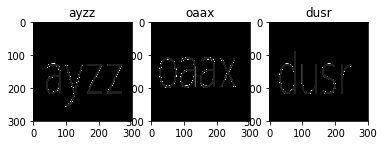

In [10]:
# show some image
fig,ax =  plt.subplots(1,3)
ix = np.random.randint(0,7000,size = 3)
for i in range(len(ix)):
    ax[i].imshow(img[i],cmap="gray")
    ax[i].set_title(label[i])

In [11]:
#Preprocessing
label[:5]

['ayzz', 'oaax', 'dusr', 'jxlk', 'pjix']

In [12]:
len(string.ascii_lowercase)

26

In [13]:
label_all = {ixd:label for label,ixd in enumerate(string.ascii_lowercase)}

In [14]:
import keras
from keras.utils import to_categorical

Using TensorFlow backend.


In [16]:
to_categorical(0,num_classes=26).shape

(1, 26)

In [89]:
def convert_label_to_categical():
    label_array = np.zeros((len(label),4,26))
    for i_label in range(len(label)):
        for index,ch in zip(range(len(label[i_label])),label[i_label]):   
            label_array[i_label,index,:] = to_categorical(label_all[ch],num_classes=26)
    print("Done!")
    return label_array

In [90]:
label_captcha = convert_label_to_categical()

Done!


In [91]:
im_captcha = np.array(img)
im_captcha = im_captcha.reshape((-1,1,300,300))


In [92]:
print("image shape ",im_captcha.shape,"label shape :",label_captcha.shape)

image shape  (7000, 1, 300, 300) label shape : (7000, 4, 26)


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(im_captcha,label_captcha,test_size =0.3,random_state=101)

In [95]:
print("train size :",X_train.shape)
print("test size :",y_train.shape)

train size : (4900, 1, 300, 300)
test size : (4900, 4, 26)


In [96]:
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,MaxPool2D,Activation,Dense,Flatten,Reshape,Input
from keras.optimizers import Adam
from keras.models import Model

In [97]:
model_input=Input((1,300,300))

x = Conv2D(64,kernel_size=(3,3),strides=(1, 1),padding="same")(model_input)
x = Activation('relu')(x)
x = Conv2D(128, kernel_size=(3,3),strides=(1, 1),padding="same")(x)
x = Activation('relu')(x)
x = Dropout(0.25)(x)
conv_out = Flatten()(x)

x1 = Dense(26, activation='softmax')(conv_out)
x2 = Dense(26, activation='softmax')(conv_out)
x3 = Dense(26, activation='softmax')(conv_out)
x4 = Dense(26, activation='softmax')(conv_out)


lst = [x1, x2, x3, x4]

model = Model(input=model_input, output=lst)

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

C:\Users\Thor\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [98]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 1, 300, 300)   0                                            
____________________________________________________________________________________________________
conv2d_19 (Conv2D)               (None, 1, 300, 64)    172864      input_4[0][0]                    
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 1, 300, 64)    0           conv2d_19[0][0]                  
____________________________________________________________________________________________________
conv2d_20 (Conv2D)               (None, 1, 300, 128)   73856       activation_7[0][0]               
___________________________________________________________________________________________

In [99]:
model.fit(X_train,y_train,epochs=10,batch_size=128)

ValueError: The model expects 4 target arrays, but only received one array. Found: array with shape (4900, 4, 26)

In [101]:
y_train[1,1].shape

(26,)

In [85]:
label_captcha[1,1]

array([ 0.,  0.,  0.,  0.])

In [86]:
label_array = np.zeros((len(label),4,26))

In [88]:
label_array[1,1,]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])